### Problem Statement

*This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).
A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)) to determine whether a person makes over $50K a year.*    

#### Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib
%matplotlib inline

##### Importing dataset

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### EDA

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (32560, 15)


In [4]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


<AxesSubplot:>

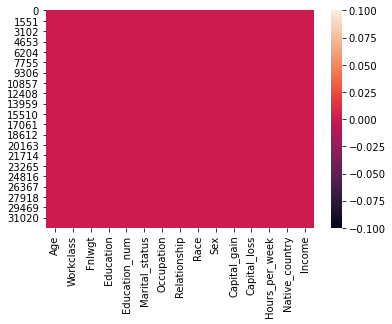

In [5]:
sn.heatmap(df.isnull())

no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### There are 9 object type variables and 6 numeric

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


for capital_gain and Capital_loss have high standard deviation,there is large diffence between Max ans 75%, it means there are outliers present.
capital.gain - majority of the values are 0, and same for the capital.loss so we can drop the both the column.

In [8]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

##### Check for missing values

In [9]:
for i in df.columns:
    if 0<len(df[df[i]==' ?']):
        print(i)
        print(len(df[df[i]==' ?']))

Workclass
1836
Occupation
1843
Native_country
583


In [10]:
df = df.replace(' ?',np.NaN)

<AxesSubplot:>

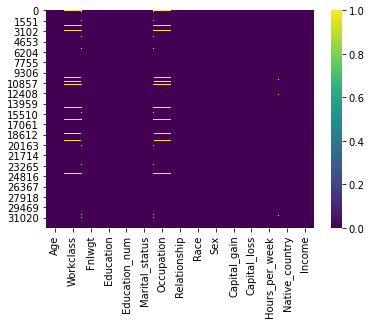

In [11]:
sn.heatmap(df.isna(),cmap='viridis')

##### Missing values in workclass, occupation, native country

#### Filling missing values

In [12]:
columns_with_nan = ["Workclass", "Occupation", "Native_country"]

In [13]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

<AxesSubplot:>

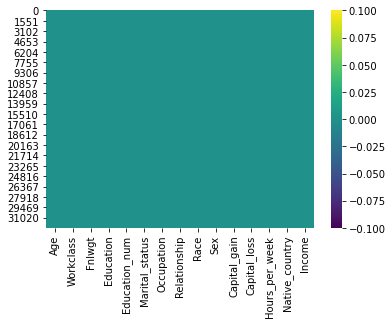

In [14]:
sn.heatmap(df.isna(),cmap='viridis')

In [15]:
categorical=df.select_dtypes(include=["object"]).keys()
categorical

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

#### Univariate Analysis

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

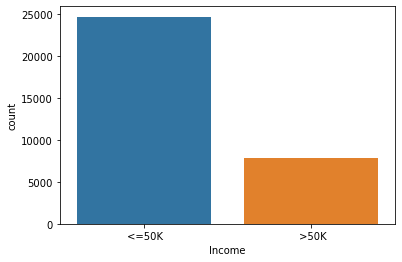

In [16]:
sn.countplot(x='Income', data = df)
df['Income'].value_counts()

###### Class Imbalance for target variable .

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

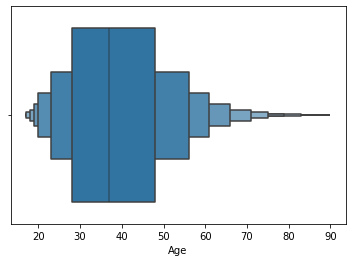

In [17]:
sn.boxenplot(x='Age', data = df)
df['Age'].value_counts()

###### Highest number of population works around the age range late 20's - 40's

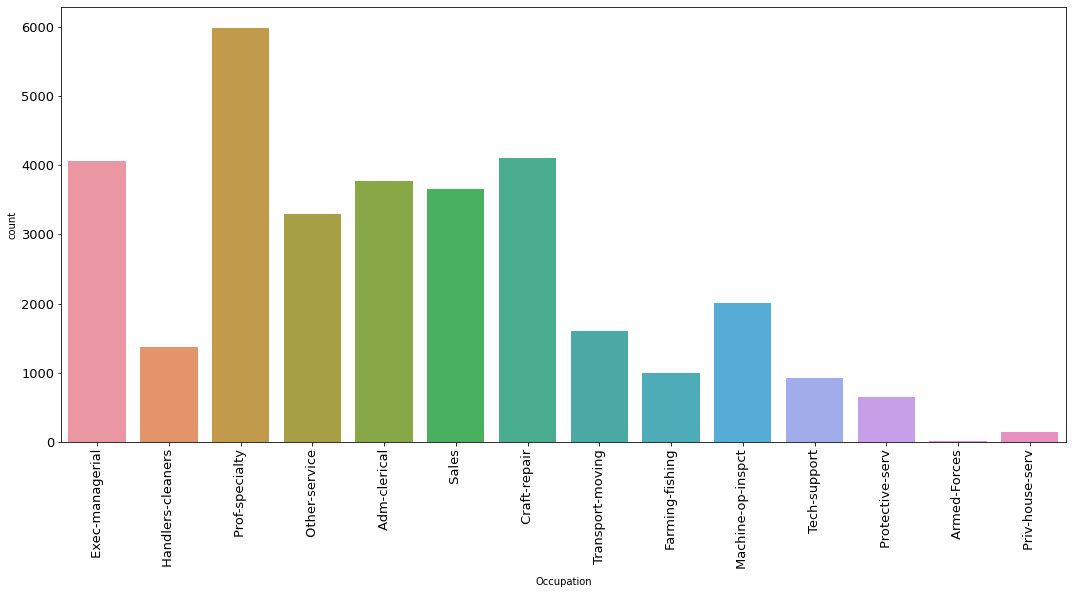

In [18]:
plt.figure(figsize = (18,8))
ax=sn.countplot(x="Occupation", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(labelsize=13)
plt.show()

Prof-specialty - more number of population are engaged in this occupation
Exec-managerial - also has a good population working under this occupation type
Armed-Forces - Least population

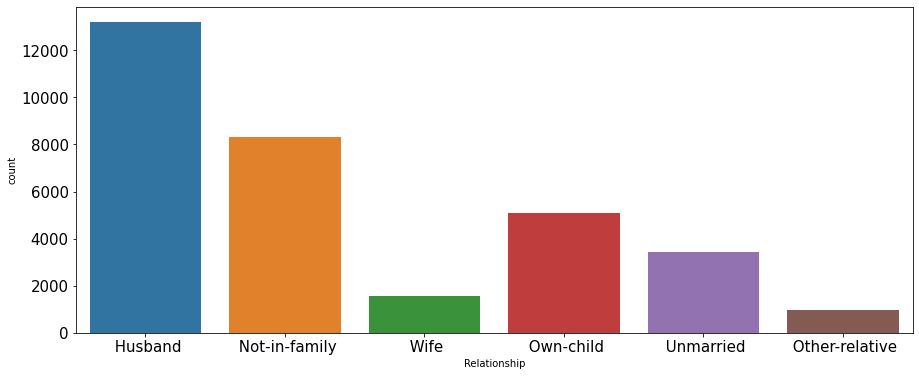

In [19]:
plt.figure(figsize = (15,6))
sn.countplot(x="Relationship", data=df)
plt.tick_params(labelsize=15)
plt.show()

#### We observe that the percentage of working Husband for the family is more when compared to the percentage of Working Wife
The percentage of population with no family has also a good employment rate

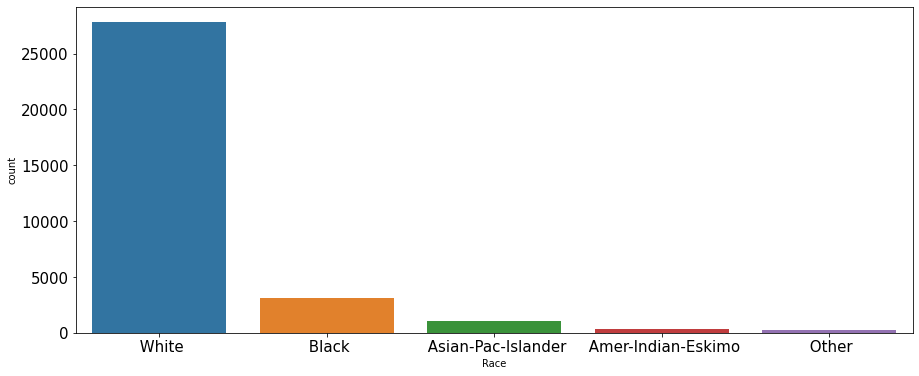

In [20]:
plt.figure(figsize = (15,6))
sn.countplot(x="Race", data=df)
plt.tick_params(labelsize=15)
plt.show()

###### The population of Race "White" has the more working rate when compared to other race type with a drastic range

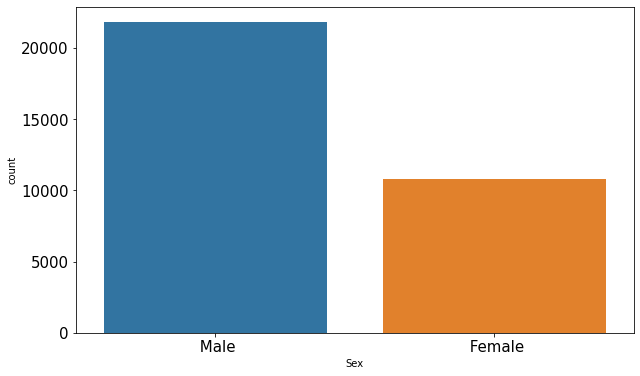

In [21]:
plt.figure(figsize = (10,6))
sn.countplot(x="Sex", data=df)
plt.tick_params(labelsize=15)
plt.show()

###### Number of counts are more for Male when compared to Female

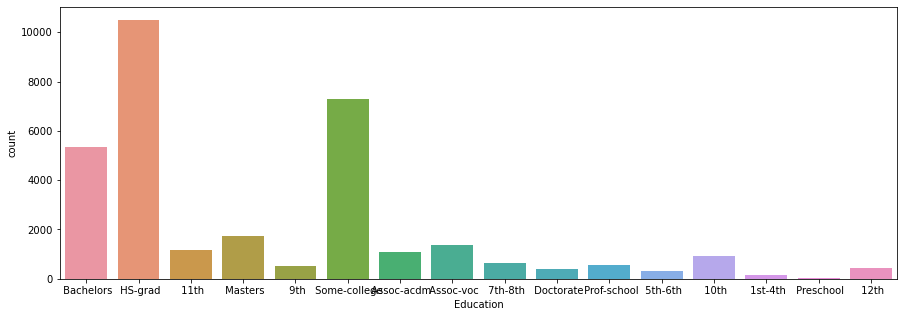

<AxesSubplot:xlabel='Education_num', ylabel='count'>

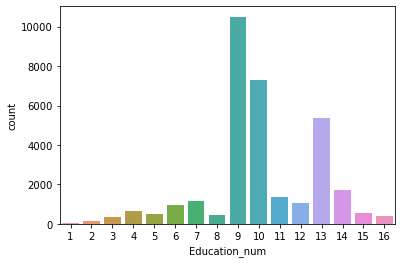

In [22]:
plt.figure(figsize = [15,5])
sn.countplot(x='Education',data=df)
plt.show()
sn.countplot(x='Education_num',data=df)

##### Bivariate analaysis

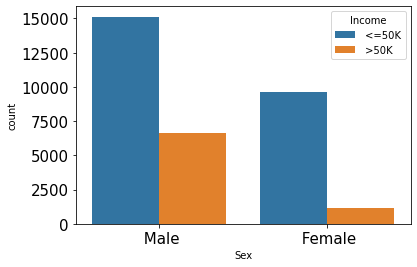

In [23]:
sn.countplot(df['Sex'],hue=df['Income'])
plt.tick_params(labelsize=15)

##### Percentage of Males are earning over ">50K" are high when compared to Females earning over ">50K"

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

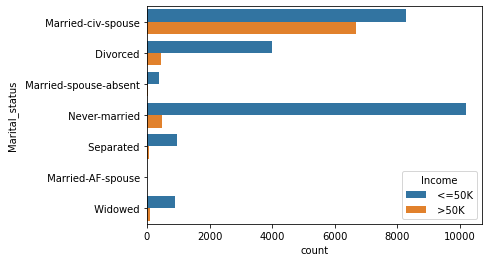

In [24]:
sn.countplot(y=df['Marital_status'], hue=df['Income'])

###### Never married,Separated,Widowed and Dovorced working are having salary less than 50k`

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

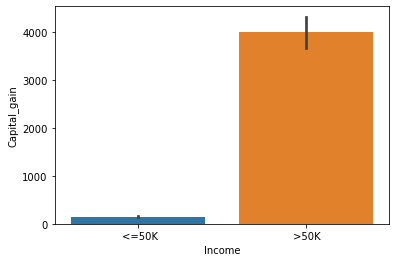

In [25]:
sn.barplot(x = 'Income', y = 'Capital_gain', data = df)

##### The high income leads to more Capital gain

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

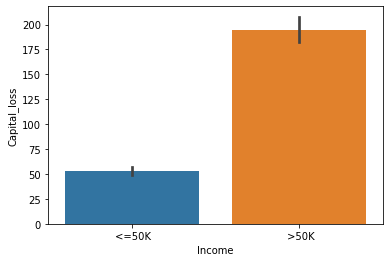

In [26]:
sn.barplot(x = 'Income', y = 'Capital_loss', data = df)

###### Population who earn over ">50K" also leads to more "Capital Loss, when compared to the population who earn "<=50K

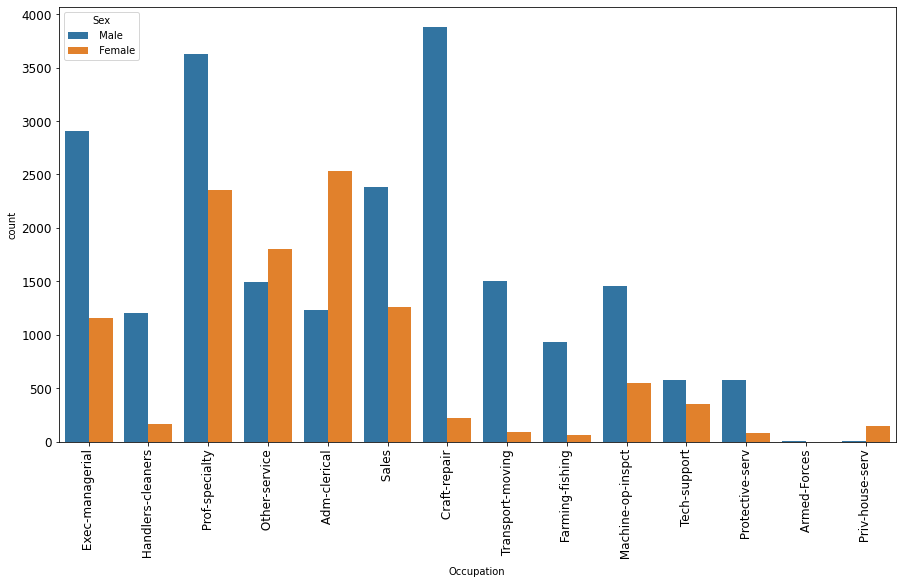

In [27]:
plt.figure(figsize=(15,8))
ax = sn.countplot(df['Occupation'], hue=df['Sex'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(labelsize=12)
plt.show()

##### the highest working population are engaged with "Craft-repair" occupdation type

#### Multivariate analysis

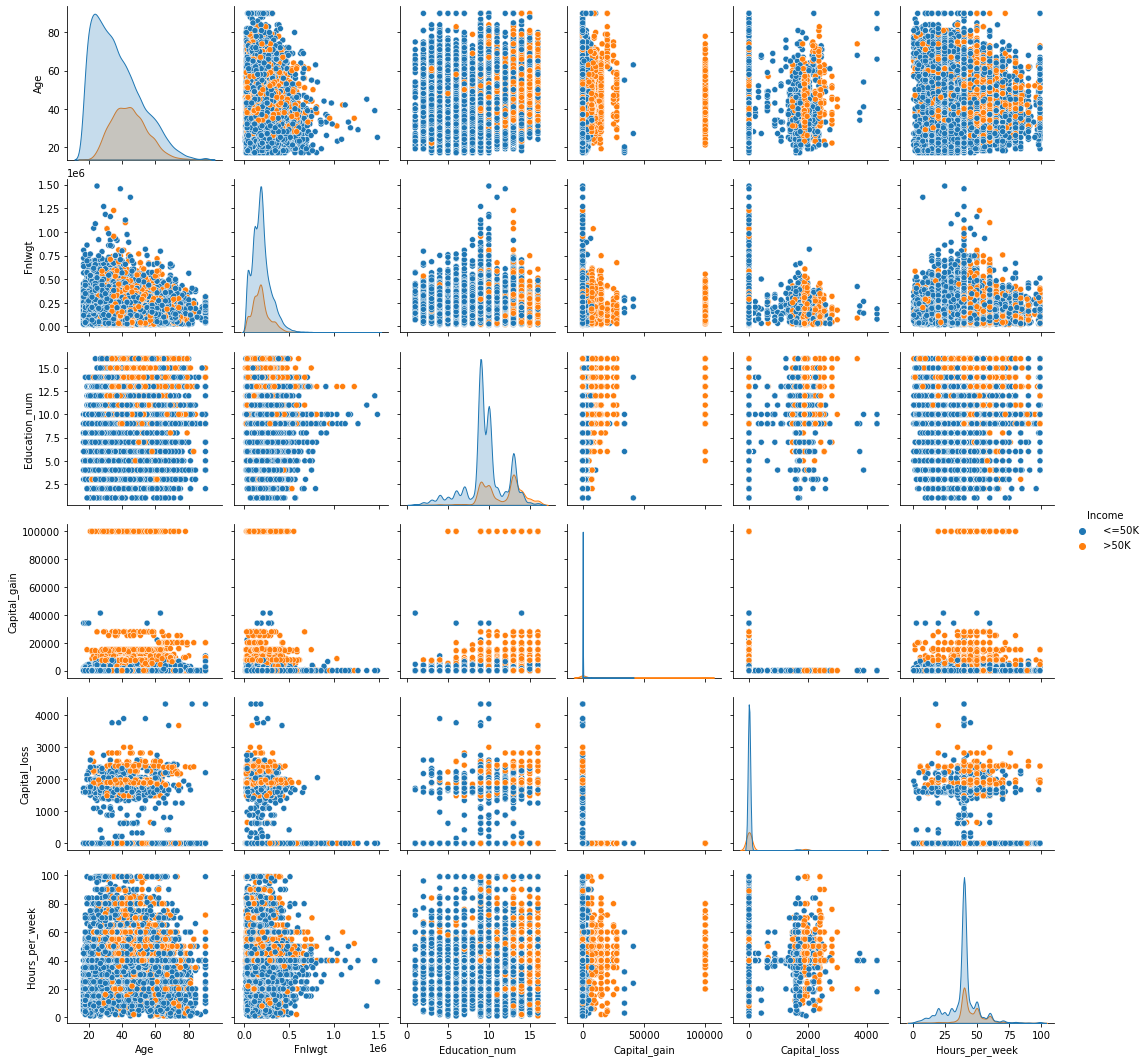

In [28]:
sn.pairplot(df,hue='Income')

##### Converting Categorical into numeric

In [29]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [30]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


##### Balancig the dataset

In [32]:
dfmin=df[df['Income']==1]
dfmax=df[df['Income']==0]
dfminup=resample(dfmin,replace=True,n_samples=24719,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of salary less than equal to 50k are:',dff['Income'].value_counts()[0])
print('Number of salary more than 50k are:',dff['Income'].value_counts()[1])
print('Unbalanced dataset' if dff['Income'].value_counts()[0]!=dff['Income'].value_counts()[1] else 'Balanced dataset')

Number of salary less than equal to 50k are: 24719
Number of salary more than 50k are: 24719
Balanced dataset


#### Correlation

In [33]:
dff.corr()['Income']

Age               0.289057
Workclass         0.007416
Fnlwgt           -0.008812
Education         0.100334
Education_num     0.386683
Marital_status   -0.261896
Occupation        0.042777
Relationship     -0.290831
Race              0.083731
Sex               0.269534
Capital_gain      0.183494
Capital_loss      0.154448
Hours_per_week    0.272950
Native_country    0.027868
Income            1.000000
Name: Income, dtype: float64

##### dropping columns with least correlation

In [34]:
dff=dff.drop(['Fnlwgt','Workclass'],axis=1)

<AxesSubplot:>

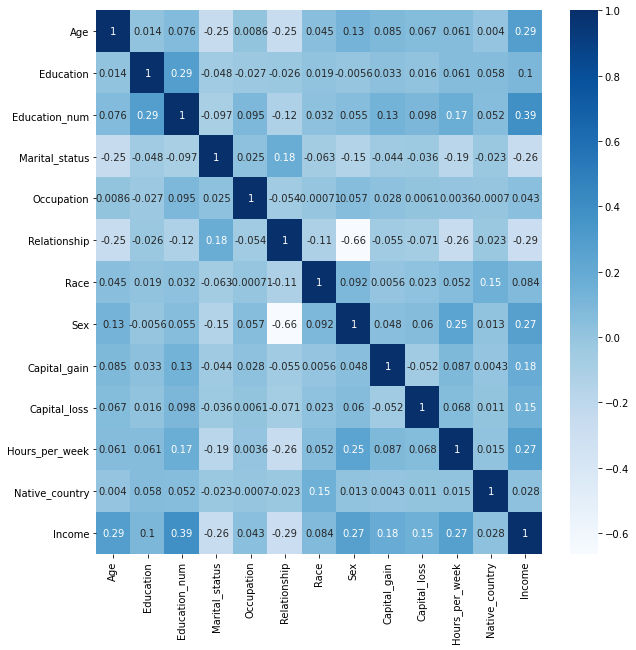

In [35]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

##### Check Distribution plot

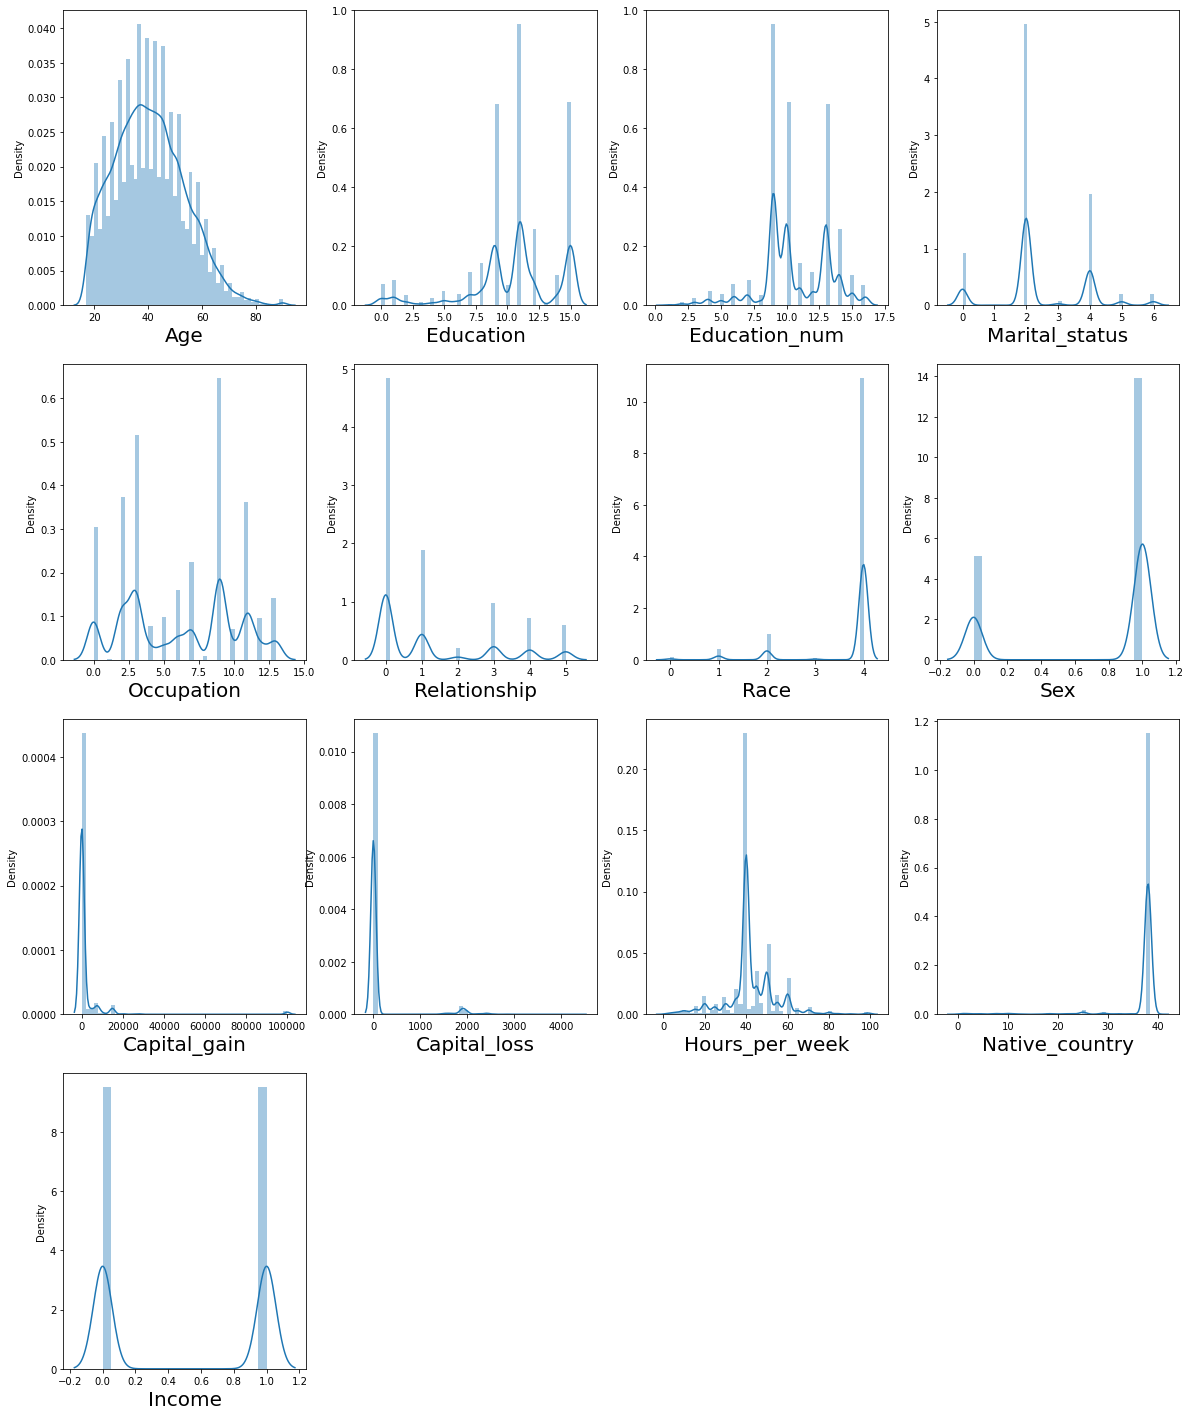

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### columns having normal distribution plot: native_country (categorical data), capital_loss (positively skewed), capital_gain (positively skewed), Age

##### rest all columns have bimodal distribution plot

#### Check for outliers

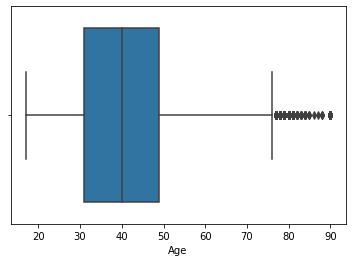

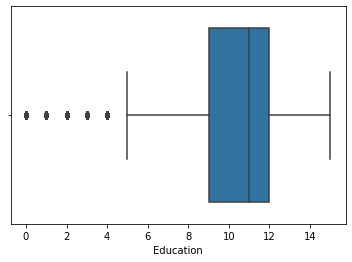

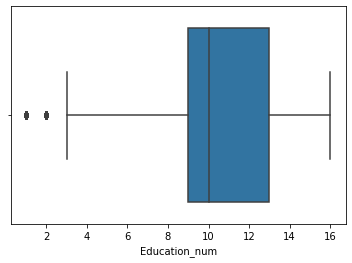

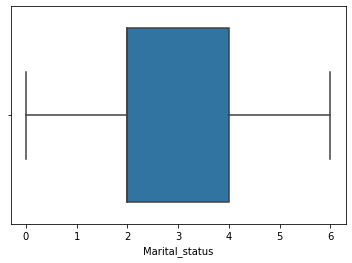

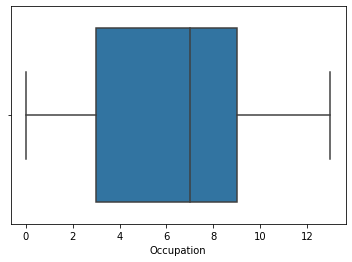

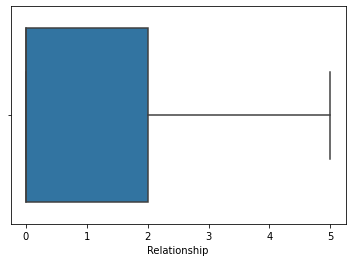

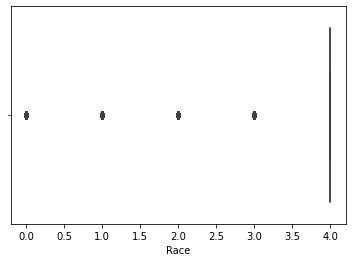

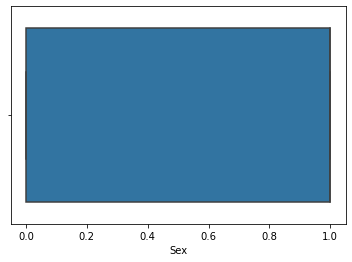

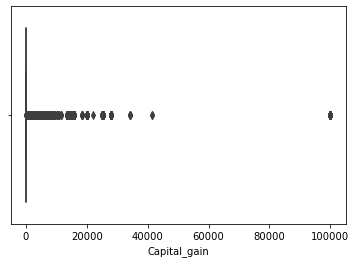

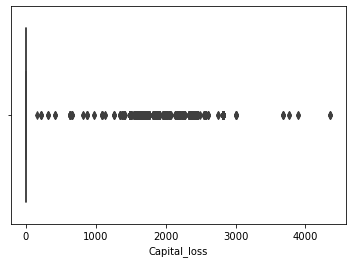

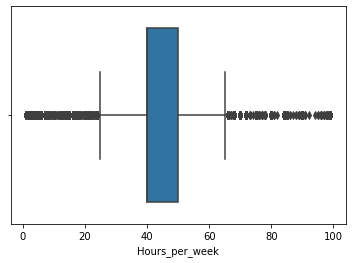

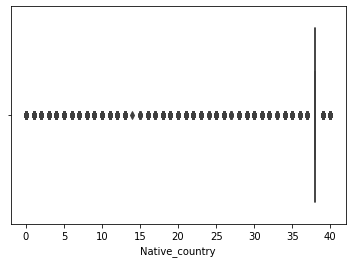

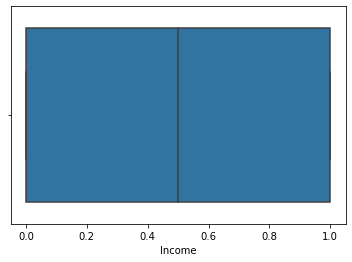

In [37]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

##### ouliers in almost most coloumns excluding categorical ones

In [38]:
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(49438, 13)
(41869, 13)


In [39]:
((49438-41869)/49438)*100

15.310085359440107

#### data loss more than 10% so can't remove outliers

In [40]:
y = dff[['Income']]
x = dff.drop(columns = ['Income'])

#### Skewness check

In [41]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Age               0.390765
Education        -0.949216
Education_num    -0.317976
Marital_status    0.324518
Occupation       -0.007107
Relationship      1.144181
Race             -2.633863
Sex              -1.044303
Capital_gain      8.385728
Capital_loss      3.652833
Hours_per_week    0.285011
Native_country   -4.392290
dtype: float64
3


In [42]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [43]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Age               0.390765
Education        -0.949216
Education_num    -0.317976
Marital_status    0.324518
Occupation       -0.007107
Relationship      0.340383
Race             -2.633863
Sex              -1.044303
Capital_gain      3.040787
Capital_loss      3.497646
Hours_per_week    0.285011
Native_country   -4.392290
dtype: float64
2


#### Find the best features using Univariate Selection

In [44]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

             Specs         Score
8     Capital_gain  85651.935144
0              Age  17059.627679
10  Hours_per_week  13030.143270
9     Capital_loss  12934.504718
5     Relationship   6588.777529
2    Education_num   4746.905944
3   Marital_status   2521.319121
7              Sex    964.624889
1        Education    601.063243
4       Occupation    228.716228


##### lets do feature scaling on non categorical values only

In [45]:
newdf=x[['Capital_gain','Age','Hours_per_week','Capital_loss','Relationship','Education_num','Marital_status',
         'Sex','Education','Occupation']]
newdf['Income']=y
newdf

,Capital_gain,Age,Hours_per_week,Capital_loss,Relationship,Education_num,Marital_status,Sex,Education,Occupation,Income
0,0.000000,50,13,0.0,0.000000,13,2,1,9,3,0
1,0.000000,38,40,0.0,1.000000,9,0,1,11,5,0
2,0.000000,53,40,0.0,0.000000,7,2,1,1,5,0
3,0.000000,28,40,0.0,1.709976,13,2,0,9,9,0
4,0.000000,37,40,0.0,1.709976,14,2,0,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...
3699,0.000000,53,60,0.0,0.000000,10,2,1,15,3,1
18063,0.000000,31,50,0.0,1.709976,13,2,0,9,3,1
28086,24.675267,41,40,0.0,0.000000,15,2,1,14,3,1
6034,46.415734,78,20,0.0,1.000000,13,4,1,9,3,1


In [46]:
scaler = StandardScaler()
newdf[['Capital_gain','Capital_loss']] = scaler.fit_transform(newdf[['Capital_gain','Capital_loss']])
newdf.reset_index(inplace=True)
newdf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Relationship,Education_num,Marital_status,Sex,Education,Occupation,Income
0,0,-0.356646,50,13,-0.266622,0.000000,13,2,1,9,3,0
1,1,-0.356646,38,40,-0.266622,1.000000,9,0,1,11,5,0
2,2,-0.356646,53,40,-0.266622,0.000000,7,2,1,1,5,0
3,3,-0.356646,28,40,-0.266622,1.709976,13,2,0,9,9,0
4,4,-0.356646,37,40,-0.266622,1.709976,14,2,0,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49433,3699,-0.356646,53,60,-0.266622,0.000000,10,2,1,15,3,1
49434,18063,-0.356646,31,50,-0.266622,1.709976,13,2,0,9,3,1
49435,28086,2.759440,41,40,-0.266622,0.000000,15,2,1,14,3,1
49436,6034,5.504907,78,20,-0.266622,1.000000,13,4,1,9,3,1


#### randomly sample dataset to 30%

In [47]:
n=49438
s=14829
skip = sorted(random.sample(range(1, n), n-s))  # n+1 to compensate for header
sampledf=newdf.copy()
sampledf.drop(skip,axis=0,inplace=True)
sampledf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Relationship,Education_num,Marital_status,Sex,Education,Occupation,Income
0,0,-0.356646,50,13,-0.266622,0.000000,13,2,1,9,3,0
8,14,-0.356646,34,45,-0.266622,0.000000,4,2,1,5,13,0
12,20,-0.356646,54,20,-0.266622,1.587401,9,5,0,11,7,0
15,23,-0.356646,59,40,-0.266622,1.587401,9,0,0,11,12,0
17,27,-0.356646,39,80,-0.266622,1.000000,9,0,1,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49416,1020,-0.356646,48,35,-0.266622,0.000000,14,2,1,12,9,1
49422,3296,-0.356646,76,40,-0.266622,0.000000,9,2,1,11,9,1
49427,22612,-0.356646,39,50,-0.266622,1.000000,14,4,1,12,3,1
49431,9021,-0.356646,45,50,-0.266622,0.000000,9,2,1,11,11,1


In [48]:
sampledf=sampledf.drop(['index'],axis=1)
sampledf

,Capital_gain,Age,Hours_per_week,Capital_loss,Relationship,Education_num,Marital_status,Sex,Education,Occupation,Income
0,-0.356646,50,13,-0.266622,0.000000,13,2,1,9,3,0
8,-0.356646,34,45,-0.266622,0.000000,4,2,1,5,13,0
12,-0.356646,54,20,-0.266622,1.587401,9,5,0,11,7,0
15,-0.356646,59,40,-0.266622,1.587401,9,0,0,11,12,0
17,-0.356646,39,80,-0.266622,1.000000,9,0,1,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...
49416,-0.356646,48,35,-0.266622,0.000000,14,2,1,12,9,1
49422,-0.356646,76,40,-0.266622,0.000000,9,2,1,11,9,1
49427,-0.356646,39,50,-0.266622,1.000000,14,4,1,12,3,1
49431,-0.356646,45,50,-0.266622,0.000000,9,2,1,11,11,1


In [49]:
y = sampledf[['Income']]
x = sampledf.drop(columns = ['Income'])

In [50]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### Model Building & evaluation

In [51]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [52]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8570111109112222
roc 0.7827187658723285
diff 0.0742923450388937
**********
DecisionTreeClassifier()
score 0.8337524817361144
roc 0.830904483425481
diff 0.002847998310633426
**********
KNeighborsClassifier()
score 0.8436286632457357
roc 0.781845944118491
diff 0.061782719127244756
**********
RandomForestClassifier()
score 0.9232453365353482
roc 0.8636576938134922
diff 0.059587642721856016
**********
SVC()
score 0.860485818720225
roc 0.7827415015262444
diff 0.07774431719398056
**********
RidgeClassifier()
score 0.8592224790859222
roc 0.7907380857216001
diff 0.0684843933643221
**********
BaggingClassifier()
score 0.9108561875713719
roc 0.8524424230932404
diff 0.058413764478131514
**********
GradientBoostingClassifier()
score 0.9228958314305764
roc 0.848120602640337
diff 0.07477522879023946
**********
SGDClassifier()
score 0.8298788662305825
roc 0.7079364256550937
diff 0.12194244057548875
**********
LGBMClassifier()
score 0.931775287122764
roc 0.85424

##### ExtraTreesClassifier is the best model and has least difference.

##### Hyperparameter tuning

In [54]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':list(range(3,36))}
clf = RandomizedSearchCV(ExtraTreesClassifier(), parameters, cv=20,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.2s finished


{'max_features': 'sqrt', 'max_depth': 22, 'criterion': 'entropy'}

#### Finding best random state

In [55]:
besttrain(ExtraTreesClassifier(criterion='entropy',max_depth=22,max_features='sqrt'),x,y)

maximum roc_auc_score is at random state : 77  and it is : 0.8721392295068773


#### Fit the best model

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 77,test_size=0.20,stratify=y)
model=ExtraTreesClassifier(criterion='entropy',max_depth=22,max_features='sqrt')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

##### check all the metrics of the model

In [57]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[1253  240]
 [ 133 1340]]
f1 score is :  0.8778250900753357
classification report 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1493
           1       0.85      0.91      0.88      1473

    accuracy                           0.87      2966
   macro avg       0.88      0.87      0.87      2966
weighted avg       0.88      0.87      0.87      2966

AUC ROC Score:  0.8744789556513788
CV mean 0.9365108192391063
std: 0.0024512851512291317


### Test on full dataset

In [58]:
newdf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Relationship,Education_num,Marital_status,Sex,Education,Occupation,Income
0,0,-0.356646,50,13,-0.266622,0.000000,13,2,1,9,3,0
1,1,-0.356646,38,40,-0.266622,1.000000,9,0,1,11,5,0
2,2,-0.356646,53,40,-0.266622,0.000000,7,2,1,1,5,0
3,3,-0.356646,28,40,-0.266622,1.709976,13,2,0,9,9,0
4,4,-0.356646,37,40,-0.266622,1.709976,14,2,0,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49433,3699,-0.356646,53,60,-0.266622,0.000000,10,2,1,15,3,1
49434,18063,-0.356646,31,50,-0.266622,1.709976,13,2,0,9,3,1
49435,28086,2.759440,41,40,-0.266622,0.000000,15,2,1,14,3,1
49436,6034,5.504907,78,20,-0.266622,1.000000,13,4,1,9,3,1


In [59]:
y = newdf[['Income']]
x = newdf.drop(columns = ['Income','index'])

In [60]:
y_pred=model.predict(x)

In [61]:
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))

Confusion matrix 
 [[20918  3801]
 [ 2080 22639]]
f1 score is :  0.8850446646728826
classification report 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88     24719
           1       0.86      0.92      0.89     24719

    accuracy                           0.88     49438
   macro avg       0.88      0.88      0.88     49438
weighted avg       0.88      0.88      0.88     49438



In [62]:
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

AUC ROC Score:  0.881042922448319
CV mean 0.9672568510973661
std: 0.002034279890037757


#### AUC_ROC

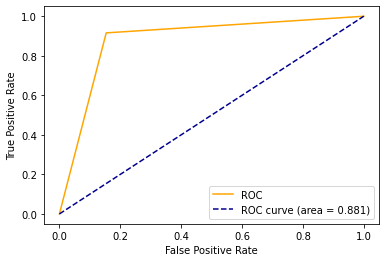

In [63]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [64]:
x = newdf.drop(columns = ['Income','index'])
y_pred=model.predict(x)
newdf['Income_pred']=y_pred
newdf[['Income','Income_pred']]

,Income,Income_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
49433,1,1
49434,1,1
49435,1,1
49436,1,1


In [65]:
newdf.Income.value_counts(),newdf.Income_pred.value_counts()

(0    24719
 1    24719
 Name: Income, dtype: int64,
 1    26440
 0    22998
 Name: Income_pred, dtype: int64)

##### Distribution plots of actual vs predicted

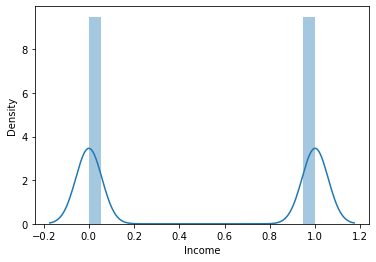

<AxesSubplot:xlabel='Income_pred', ylabel='Density'>

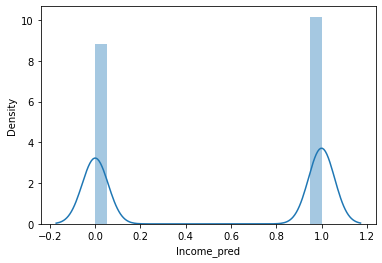

In [66]:
sn.distplot(newdf['Income'])
plt.show()
sn.distplot(newdf['Income_pred'])

##### almost similar

#### heatmap of confusion matrix

<AxesSubplot:>

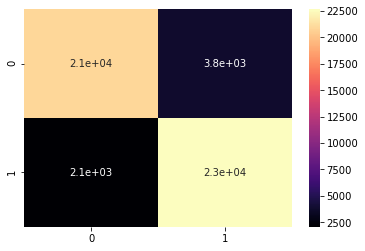

In [67]:
sn.heatmap(confusion_matrix(newdf['Income'],newdf['Income_pred']),annot=True,cmap="magma",xticklabels=model.classes_
               ,yticklabels=model.classes_)

In [68]:
confusion_matrix(newdf['Income'],newdf['Income_pred'])

array([[20918,  3801],
       [ 2080, 22639]], dtype=int64)

## Saving the best model

In [69]:
joblib.dump(model, 'census_income_pred.pkl')

['census_income_pred.pkl']